# All Imports 

In [1]:
# Standard libraries
from pathlib import Path

# Data manipulation
import pandas as pd
import numpy as np

# Machine learning and dimensionality reduction
from sklearn.decomposition import PCA
import umap

# Chemistry with RDKit
from rdkit import Chem
from rdkit.Chem import AllChem

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

# Utility libraries
from tqdm import tqdm
from scipy.ndimage import gaussian_filter1d

# Custom module
from normalisation import BioproxyEvaluator

/home/maxime/.cache/pypoetry/virtualenvs/normalisation-RVbkHmRO-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def compute_morgan_fingerprints(inchi_list, radius=2, n_bits=1024):
    fingerprints = []
    for inchi in inchi_list:
        try:
            mol = Chem.MolFromInchi(inchi)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
            fingerprints.append(np.array(fp))
        except:
            fingerprints.append(np.zeros(n_bits))  # Fallback for invalid InChI
    return np.array(fingerprints)

In [3]:
evaluator = BioproxyEvaluator({
        #    "ChemBL": Path("../../bioproxy/screens_data_chembl"),
            "Curie": Path("../../bioproxy/screens_data_curie"),
        })
evaluator

Bioproxy Evaluator with:
  ChemBL: 0 assays
  Curie: 16 assays

In [4]:
matrix_folder = Path('/home/maxime/data/cell_painting/paper_data')
df_screen = pd.read_csv(matrix_folder / 'screen_df_E15.csv')
profiles = np.load(matrix_folder / 'profiles_E15.npy').astype(np.float64)

FileNotFoundError: [Errno 2] No such file or directory: '/home/maxime/data/cell_painting/paper_data/profiles_E15.npy'

In [5]:
embedding_col = 'Embeddings_mean'
df_phenom = pd.read_parquet('/home/maxime/synrepos/phenospace/normalisation/publication/data/norm_2_compounds_embeddings.parquet')

#df_phenom = pd.read_parquet('/projects/synsight/data/openphenom/norm_2_compounds_embeddings.parquet')
df_phenom.drop(columns=['path_embedding', 'Metadata_Is_Control'], inplace=True)
evaluator.add_embeddings(df_phenom, embeddings_cols=None)



In [6]:
df_screen = evaluator.screens_data['Curie']['E15']

In [68]:
jcp_2022 = ['JCP2022_103583', 'JCP2022_021041', 'JCP2022_007041' , 'JCP2022_077096', 'JCP2022_057581', 'JCP2022_112877', 'JCP2022_020269', 'JCP2022_013346']

In [69]:
df_go = df_phenom[df_phenom['Metadata_JCP2022'].isin(jcp_2022)][['Metadata_JCP2022', 'Metadata_InChI']]

In [76]:
df_go[df_go['Metadata_JCP2022'] ==  'JCP2022_007041']['Metadata_InChI'].iloc[0]

'InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-39(12-8-20-64-57(60)61)56(89)77-21-9-13-46(77)55(88)75-76-58(62)90)69-54(87)45(29-91-59(3,4)5)74-50(83)41(23-32-14-16-35(79)17-15-32)70-53(86)44(28-78)73-51(84)42(24-33-26-65-37-11-7-6-10-36(33)37)71-52(85)43(25-34-27-63-30-66-34)72-48(81)38-18-19-47(80)67-38/h6-7,10-11,14-17,26-27,30-31,38-46,65,78-79H,8-9,12-13,18-25,28-29H2,1-5H3,(H,63,66)(H,67,80)(H,68,82)(H,69,87)(H,70,86)(H,71,85)(H,72,81)(H,73,84)(H,74,83)(H,75,88)(H4,60,61,64)(H3,62,76,90)'

In [73]:
df_go.to_latex()

'\\begin{tabular}{lll}\n\\toprule\n & Metadata_JCP2022 & Metadata_InChI \\\\\n\\midrule\n16232 & JCP2022_013346 & InChI=1S/C15H12N2O2/c16-15(19)17-12-7-3-1-5-10(12)9-14(18)11-6-2-4-8-13(11)17/h1-8H,9H2,(H2,16,19) \\\\\n39791 & JCP2022_103583 & InChI=1S/C19H31N3O6/c1-5-9-20-16(23)14-15(28-14)17(24)21-13(11(3)6-2)18(25)22-10-7-8-12(22)19(26)27-4/h11-15H,5-10H2,1-4H3,(H,20,23)(H,21,24) \\\\\n43160 & JCP2022_057581 & InChI=1S/C18H22N2O/c1-17(2,3)14-8-12(7-13(10-19)11-20)9-15(16(14)21)18(4,5)6/h7-9,21H,1-6H3 \\\\\n56045 & JCP2022_007041 & InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-39(12-8-20-64-57(60)61)56(89)77-21-9-13-46(77)55(88)75-76-58(62)90)69-54(87)45(29-91-59(3,4)5)74-50(83)41(23-32-14-16-35(79)17-15-32)70-53(86)44(28-78)73-51(84)42(24-33-26-65-37-11-7-6-10-36(33)37)71-52(85)43(25-34-27-63-30-66-34)72-48(81)38-18-19-47(80)67-38/h6-7,10-11,14-17,26-27,30-31,38-46,65,78-79H,8-9,12-13,18-25,28-29H2,1-5H3,(H,63,66)(H,67,80)(H,68,82)(H,69,87)(H,70,86)(H,71,85)(H,72,81)(H,73,84)(H,74,83

# E15

In [7]:
## previous analysis

In [55]:
df_screen

,Molecule_Name,Replica_R1,Replica_R2,Replica_R3,robust_z_score_Cell_Count,Metadata_Bioactivity,hit_type,compound_id,inchi,Metadata_JCP2022,role_val,Metadata_InChI,Embeddings_mean,UMAP_1_fingerprint,UMAP_2_fingerprint,UMAP_1_profile,UMAP_2_profile,color
0,(s)-(+)-ketoprofen,1.021009,1.137705,0.566046,1.021009,none,none,667550.0,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,JCP2022_016618,NaN,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,"[0.23229393, -0.092516094, -0.19304232, 0.2378...",11.388973,7.861659,8.335238,9.720624,blue
1,"2',3' - dideoxycytidine",2.291278,1.865207,1.567254,1.865207,none,none,138.0,"InChI=1S/C5H11NO2/c6-4-2-1-3-5(7)8/h1-4,6H2,(H...",JCP2022_040193,NaN,"InChI=1S/C5H11NO2/c6-4-2-1-3-5(7)8/h1-4,6H2,(H...","[-0.020583093, 0.19450995, -0.37746605, -0.372...",14.133957,9.193793,9.033539,8.531041,blue
2,4-aminosalicylic acid,0.885619,1.003767,1.377421,1.003767,none,none,4649.0,InChI=1S/C7H7NO3/c8-4-1-2-5(7(10)11)6(9)3-4/h1...,JCP2022_101199,NaN,InChI=1S/C7H7NO3/c8-4-1-2-5(7(10)11)6(9)3-4/h1...,"[0.5961739, -1.0120631, -0.03339341, 0.7667959...",12.310486,8.506660,9.141513,10.116525,blue
3,aceclofenac,1.471987,0.835891,1.232155,1.232155,none,none,71771.0,InChI=1S/C16H13Cl2NO4/c17-11-5-3-6-12(18)16(11...,JCP2022_055262,NaN,InChI=1S/C16H13Cl2NO4/c17-11-5-3-6-12(18)16(11...,"[0.24274449, 0.26076004, -0.26218563, -0.06292...",11.551367,8.523082,10.018161,10.296644,blue
4,ag-126,-1.579958,0.631966,-1.253498,-1.253498,none,none,2046.0,InChI=1S/C10H5N3O3/c11-5-8(6-12)3-7-1-2-9(13(1...,JCP2022_018313,NaN,InChI=1S/C10H5N3O3/c11-5-8(6-12)3-7-1-2-9(13(1...,"[0.6354739, -0.6586356, 0.25001213, 0.19876534...",15.297726,8.743041,9.676749,9.154769,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,z-vad-fmk,-0.730843,0.785921,-14.757020,-0.730843,none,none,5497174.0,InChI=1S/C22H30FN3O7/c1-13(2)19(26-22(31)33-12...,JCP2022_054334,NaN,InChI=1S/C22H30FN3O7/c1-13(2)19(26-22(31)33-12...,"[-0.21107407, -0.3719705, -0.13413484, 0.98647...",11.488340,7.570256,7.871780,9.758266,blue
235,zaprinast,1.641057,1.247409,1.318098,1.318098,none,none,135399235.0,InChI=1S/C13H13N5O2/c1-2-7-20-9-6-4-3-5-8(9)11...,JCP2022_077927,NaN,InChI=1S/C13H13N5O2/c1-2-7-20-9-6-4-3-5-8(9)11...,"[-0.051586363, 0.00079887826, -0.058112446, 0....",11.292514,9.931304,10.575298,10.861624,blue
236,zardaverine,-0.087497,-0.250813,-0.533794,-0.250813,none,none,5723.0,InChI=1S/C12H10F2N2O3/c1-18-10-6-7(2-4-9(10)19...,JCP2022_030607,NaN,InChI=1S/C12H10F2N2O3/c1-18-10-6-7(2-4-9(10)19...,"[-0.474094, -0.11233882, 0.65616816, 0.2970280...",11.153010,10.385784,10.330372,11.159831,blue
237,zileuton,0.653964,0.326959,1.201605,0.653964,none,none,60490.0,InChI=1S/C11H12N2O2S/c1-7(13(15)11(12)14)10-6-...,JCP2022_056985,NaN,InChI=1S/C11H12N2O2S/c1-7(13(15)11(12)14)10-6-...,"[-1.0208093, 0.41218156, -0.14158025, 1.348564...",12.945689,8.130400,10.161071,8.355522,blue


In [54]:
df_screen.drop_duplicates(subset='Metadata_JCP2022', inplace=True)

In [56]:
df_screen.columns

Index(['Molecule_Name', 'Replica_R1', 'Replica_R2', 'Replica_R3',
       'robust_z_score_Cell_Count', 'Metadata_Bioactivity', 'hit_type',
       'compound_id', 'inchi', 'Metadata_JCP2022', 'role_val',
       'Metadata_InChI', 'Embeddings_mean', 'UMAP_1_fingerprint',
       'UMAP_2_fingerprint', 'UMAP_1_profile', 'UMAP_2_profile', 'color'],
      dtype='object')

In [57]:
df = df_screen

colors = df['Metadata_Bioactivity'].map(lambda x: 'red' if x == 'hit' else 'blue')

fingerprints = compute_morgan_fingerprints(df['inchi'])
profiles = np.stack(df_screen['Embeddings_mean']).astype(np.float64)

umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(fingerprints)

umap_result_2 = umap_reducer.fit_transform(profiles)

df['UMAP_1_fingerprint'] = umap_result[:, 0]
df['UMAP_2_fingerprint'] = umap_result[:, 1]
df['UMAP_1_profile'] = umap_result_2[:, 0]
df['UMAP_2_profile'] = umap_result_2[:, 1]


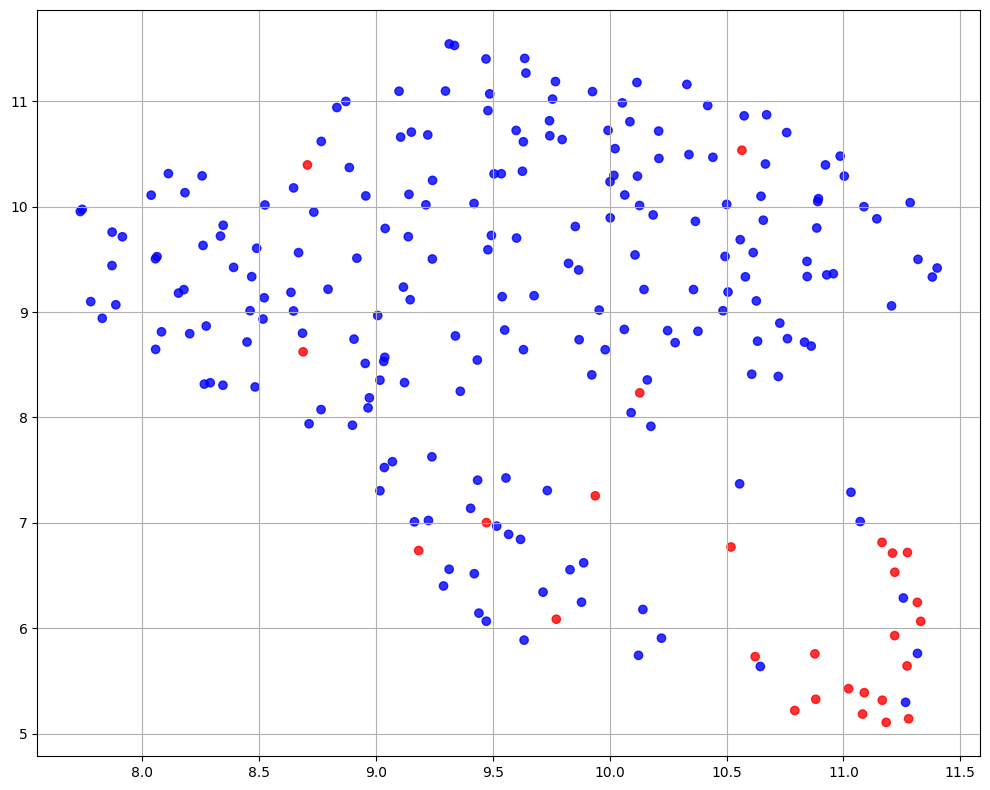

In [58]:
# Plot UMAP

plt.figure(figsize=(10, 8))
plt.scatter(umap_result_2[:, 0], umap_result_2[:, 1], c=colors, alpha=0.8)

plt.tight_layout()
plt.savefig("umap_plot.png", dpi=300)
plt.grid()
plt.show()


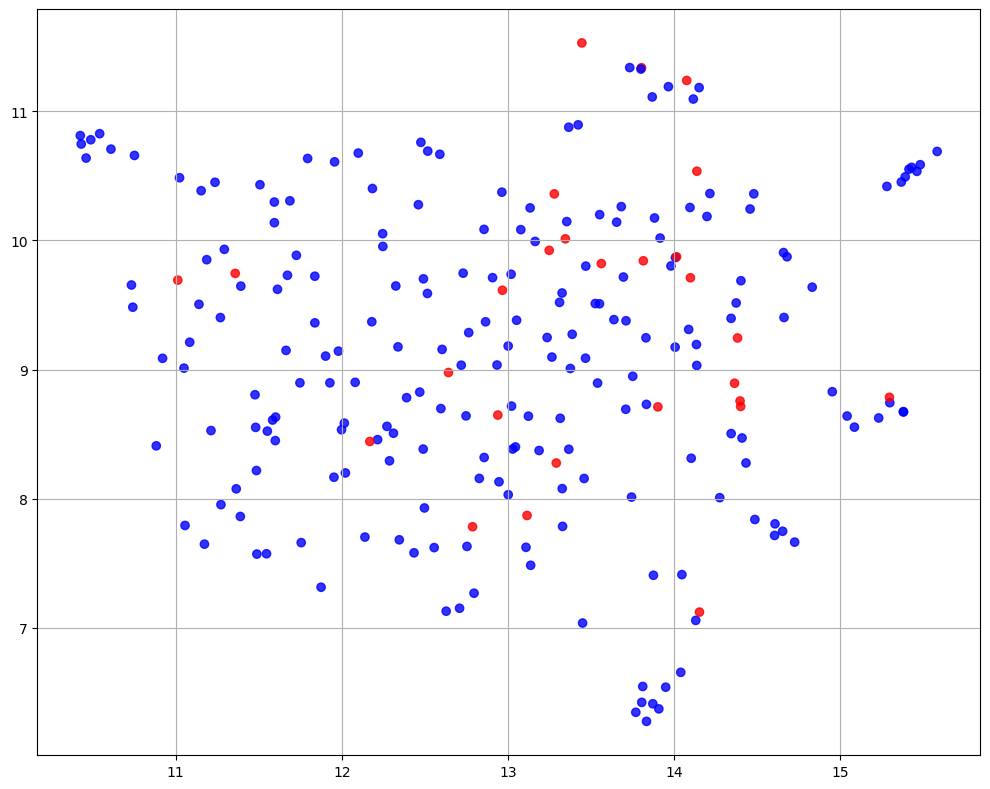

In [59]:
# Plot UMAP

plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors, alpha=0.8)

plt.tight_layout()
plt.savefig("umap_plot.png", dpi=300)
plt.grid()
plt.show()


In [60]:
hover_data = df[['Metadata_JCP2022', 'Metadata_Bioactivity']]

# Define colors based on Metadata_Bioactivity
df['color'] = df['Metadata_Bioactivity'].map(lambda x: 'red' if x == 'hit' else 'blue')

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x='UMAP_1_profile',
    y='UMAP_2_profile',
    color='Metadata_Bioactivity',
    color_discrete_map={'hit': 'red', 'non-hit': 'blue'},
    hover_data={
        'Metadata_JCP2022': True,
        'Metadata_Bioactivity': True,
        'UMAP_1_profile': False,  # Disable UMAP coordinates in hover (optional)
        'UMAP_2_profile': False   # Disable UMAP coordinates in hover (optional)
    },
    labels={'color': 'Bioactivity'},
    title="Interactive UMAP of Morgan Fingerprints"
)

# Show the interactive plot
fig.show()


In [15]:
df_export = df[df['Metadata_Bioactivity'] != "hit"][['Metadata_InChI', 'Metadata_JCP2022']]

In [16]:
df_export['Metadata_InChI'].to_list()

['InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(10-13)15(17)12-6-3-2-4-7-12/h2-11H,1H3,(H,18,19)',
 'InChI=1S/C5H11NO2/c6-4-2-1-3-5(7)8/h1-4,6H2,(H,7,8)',
 'InChI=1S/C7H7NO3/c8-4-1-2-5(7(10)11)6(9)3-4/h1-3,9H,8H2,(H,10,11)',
 'InChI=1S/C16H13Cl2NO4/c17-11-5-3-6-12(18)16(11)19-13-7-2-1-4-10(13)8-15(22)23-9-14(20)21/h1-7,19H,8-9H2,(H,20,21)',
 'InChI=1S/C10H5N3O3/c11-5-8(6-12)3-7-1-2-9(13(15)16)10(14)4-7/h1-4,14H',
 'InChI=1S/C27H44O2/c1-18(2)8-6-9-19(3)24-13-14-25-21(10-7-15-27(24,25)5)11-12-22-16-23(28)17-26(29)20(22)4/h11-12,18-19,23-26,28-29H,4,6-10,13-17H2,1-3,5H3',
 'InChI=1S/C19H27N5O4/c1-24(8-5-7-21-18(25)14-6-4-9-28-14)19-22-13-11-16(27-3)15(26-2)10-12(13)17(20)23-19/h10-11,14H,4-9H2,1-3H3,(H,21,25)(H2,20,22,23)',
 'InChI=1S/C15H23NO2/c1-4-7-13-8-5-6-9-15(13)18-11-14(17)10-16-12(2)3/h4-6,8-9,12,14,16-17H,1,7,10-11H2,2-3H3',
 'InChI=1S/C10H17N/c11-10-4-7-1-8(5-10)3-9(2-7)6-10/h7-9H,1-6,11H2',
 'InChI=1S/C6H8ClN7O/c7-2-4(9)13-3(8)1(12-2)5(15)14-6(10)11/h(H4,8,9,13)(H4,10,11,14,15)'

In [17]:
jcp_2022 = ['JCP2022_103583', 'JCP2022_021041', 'JCP2022_029463', 'JCP2022_077096', 'JCP2022_057581', ]

In [18]:
df_export['Metadata_JCP2022'].to_list()


['JCP2022_016618',
 'JCP2022_040193',
 'JCP2022_101199',
 'JCP2022_055262',
 'JCP2022_018313',
 'JCP2022_063437',
 'JCP2022_099931',
 'JCP2022_067411',
 'JCP2022_016538',
 'JCP2022_105696',
 'JCP2022_051497',
 'JCP2022_051472',
 'JCP2022_107067',
 'JCP2022_047636',
 'JCP2022_010654',
 'JCP2022_053668',
 'JCP2022_079015',
 'JCP2022_105904',
 'JCP2022_050338',
 'JCP2022_047559',
 'JCP2022_035200',
 'JCP2022_062849',
 'JCP2022_044671',
 'JCP2022_025924',
 'JCP2022_064148',
 'JCP2022_052824',
 'JCP2022_048831',
 'JCP2022_112877',
 'JCP2022_052198',
 'JCP2022_032522',
 'JCP2022_024147',
 'JCP2022_109074',
 'JCP2022_019376',
 'JCP2022_066340',
 'JCP2022_020269',
 'JCP2022_062426',
 'JCP2022_087705',
 'JCP2022_063613',
 'JCP2022_065619',
 'JCP2022_084675',
 'JCP2022_089365',
 'JCP2022_100839',
 'JCP2022_047069',
 'JCP2022_001279',
 'JCP2022_109590',
 'JCP2022_066536',
 'JCP2022_026043',
 'JCP2022_048460',
 'JCP2022_017066',
 'JCP2022_012146',
 'JCP2022_019933',
 'JCP2022_042608',
 'JCP2022_03

In [19]:
hover_data = df[['Metadata_JCP2022', 'Metadata_Bioactivity']]

# Define colors based on Metadata_Bioactivity
df['color'] = df['Metadata_Bioactivity'].map(lambda x: 'red' if x == 'hit' else 'blue')

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x='UMAP_1_fingerprint',
    y='UMAP_2_fingerprint',
    color='Metadata_Bioactivity',
    color_discrete_map={'hit': 'red', 'non-hit': 'blue'},
    hover_data={
        'Metadata_JCP2022': True,
        'Metadata_Bioactivity': True,
        'UMAP_1_fingerprint': False,  # Disable UMAP coordinates in hover (optional)
        'UMAP_2_fingerprint': False   # Disable UMAP coordinates in hover (optional)
    },
    labels={'color': 'Bioactivity'},
    title="Interactive UMAP of Morgan Fingerprints"
)

# Show the interactive plot
fig.show()


In [61]:
df[df['Metadata_JCP2022']=='JCP2022_007041']

,Molecule_Name,Replica_R1,Replica_R2,Replica_R3,robust_z_score_Cell_Count,Metadata_Bioactivity,hit_type,compound_id,inchi,Metadata_JCP2022,role_val,Metadata_InChI,Embeddings_mean,UMAP_1_fingerprint,UMAP_2_fingerprint,UMAP_1_profile,UMAP_2_profile,color
101,goserelin,1.077793,0.449154,0.74628,0.74628,none,none,5311128.0,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,JCP2022_007041,NaN,InChI=1S/C59H84N18O14/c1-31(2)22-40(49(82)68-3...,"[0.043028474, 0.1330584, 0.59033215, -0.637338...",13.448716,7.035946,10.893035,10.075953,blue


In [21]:
test = df[(df['UMAP_1_profile'] < 13.8)& (df['UMAP_2_profile'] > 4.6)]


In [22]:
test['Metadata_JCP2022'].to_list()

['JCP2022_016618',
 'JCP2022_040193',
 'JCP2022_101199',
 'JCP2022_055262',
 'JCP2022_018313',
 'JCP2022_063437',
 'JCP2022_099931',
 'JCP2022_067411',
 'JCP2022_016538',
 'JCP2022_105696',
 'JCP2022_051497',
 'JCP2022_051472',
 'JCP2022_107067',
 'JCP2022_047636',
 'JCP2022_010654',
 'JCP2022_020823',
 'JCP2022_053668',
 'JCP2022_079015',
 'JCP2022_105904',
 'JCP2022_050338',
 'JCP2022_047559',
 'JCP2022_035200',
 'JCP2022_062849',
 'JCP2022_044671',
 'JCP2022_067004',
 'JCP2022_025924',
 'JCP2022_064148',
 'JCP2022_052824',
 'JCP2022_048831',
 'JCP2022_112877',
 'JCP2022_103583',
 'JCP2022_052198',
 'JCP2022_032522',
 'JCP2022_024147',
 'JCP2022_109074',
 'JCP2022_019376',
 'JCP2022_066340',
 'JCP2022_020269',
 'JCP2022_062426',
 'JCP2022_087705',
 'JCP2022_063613',
 'JCP2022_065619',
 'JCP2022_038869',
 'JCP2022_084675',
 'JCP2022_089365',
 'JCP2022_100839',
 'JCP2022_047069',
 'JCP2022_001279',
 'JCP2022_109590',
 'JCP2022_066536',
 'JCP2022_097990',
 'JCP2022_026043',
 'JCP2022_04

## Our Analysis

In [23]:

evaluator.compute_assays_distances(embeddings_cols=["Embeddings_mean"], distance='cosine')        
for source in evaluator.screens_data.keys():
    for screen in evaluator.screens_data[source].keys():
        evaluator.distance_matrices[source][screen]['Embeddings_mean'] = 1 - evaluator.distance_matrices[source][screen]['Embeddings_mean']

In [24]:
evaluator.calculate_enrichment_factor("Curie", "E15", 'Embeddings_mean', [5]).sort_values(by='EF', ascending=False).head(7)

,Metadata_JCP2022,Percentage,EF,Norm_EF,Max_EF
0,JCP2022_020823,5,7.283951,83.333333,8.740741
1,JCP2022_067004,5,7.283951,83.333333,8.740741
6,JCP2022_004039,5,6.555556,75.000000,8.740741
2,JCP2022_103583,5,5.827160,66.666667,8.740741
4,JCP2022_097990,5,5.827160,66.666667,8.740741
3,JCP2022_038869,5,5.098765,58.333333,8.740741
23,JCP2022_027811,5,2.913580,33.333333,8.740741


In [25]:
best_jcp = evaluator.calculate_enrichment_factor("Curie", "E15", 'Embeddings_mean', [5]).sort_values(by='EF', ascending=False).iloc[0]['Metadata_JCP2022']

In [26]:
best_jcp = "JCP2022_021041"

In [49]:
res_dic = pd.DataFrame(evaluator.compute_ranking("Curie", "E15", 'Embeddings_mean', best_jcp,  plot=False))

In [48]:
df_screen = evaluator.screens_data['Curie']['E15']

In [29]:
df_screen = df_screen.merge(res_dic, on="Metadata_JCP2022")

In [50]:
df_screen[df_screen['Metadata_JCP2022']==best_jcp]

,Molecule_Name,Replica_R1,Replica_R2,Replica_R3,robust_z_score_Cell_Count,Metadata_Bioactivity,hit_type,compound_id,inchi,Metadata_JCP2022,role_val,Metadata_InChI,Embeddings_mean,UMAP_1_fingerprint,UMAP_2_fingerprint,UMAP_1_profile,UMAP_2_profile,color
95,fluvastatin,-5.855401,-6.536761,-6.00248,-6.00248,hit,killer,446155.0,InChI=1S/C24H26FNO4/c1-15(2)26-21-6-4-3-5-20(2...,JCP2022_021041,NaN,InChI=1S/C24H26FNO4/c1-15(2)26-21-6-4-3-5-20(2...,"[-0.08503226, -0.09059397, 1.1280038, -0.63892...",12.786592,7.782017,11.278967,5.140132,red


<Axes: >

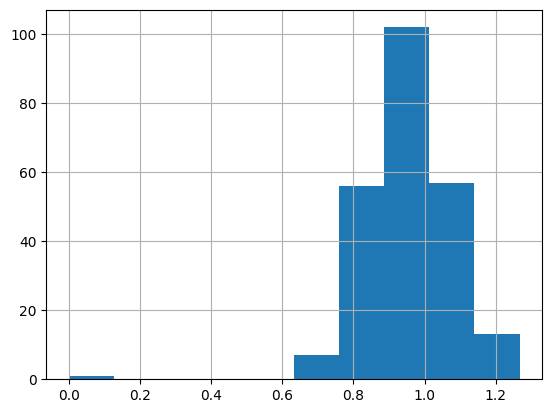

In [31]:
df_screen['Distance'].hist()

In [32]:
new_role = ['Positive Control'] + ['Selected Compound'] * 13 + ['Others'] * 222

In [33]:
df_screen.sort_values('Distance', inplace=True, ascending=False)

In [34]:
df_screen['new_role'] = new_role

In [35]:
from rdkit import Chem
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem import AllChem

# Extract the InChI of the positive control
positive_control_inchi = df_screen.loc[df_screen['new_role'] == 'Positive Control', 'inchi'].iloc[0]

# Convert the InChI of the positive control to an RDKit molecule
positive_control_mol = Chem.MolFromInchi(positive_control_inchi)
positive_control_fp = AllChem.GetMorganFingerprintAsBitVect(positive_control_mol, 2)

# Function to compute Tanimoto similarity
def compute_tanimoto_similarity(inchi, ref_fp):
    try:
        mol = Chem.MolFromInchi(inchi)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            return TanimotoSimilarity(fp, ref_fp)
        else:
            return None  # Return None if molecule is invalid
    except:
        return None  # Return None for any errors

# Calculate the Tanimoto similarity for each molecule to the positive control
df_screen['tanimoto_to_positive_control'] = df_screen['inchi'].apply(
    lambda x: compute_tanimoto_similarity(x, positive_control_fp)
)




In [47]:
df_screen

,Molecule_Name,Replica_R1,Replica_R2,Replica_R3,robust_z_score_Cell_Count,Metadata_Bioactivity,hit_type,compound_id,inchi,Metadata_JCP2022,...,Embeddings_mean,UMAP_1_fingerprint,UMAP_2_fingerprint,UMAP_1_profile,UMAP_2_profile,color,Distance,Bioactivity,new_role,tanimoto_to_positive_control
94,fluvastatin,-5.855401,-6.536761,-6.002480,-6.002480,hit,killer,446155.0,InChI=1S/C24H26FNO4/c1-15(2)26-21-6-4-3-5-20(2...,JCP2022_021041,...,"[-0.08503226, -0.09059397, 1.1280038, -0.63892...",12.786592,7.782017,11.278967,5.140132,red,1.266376,hit,Positive Control,1.000000
92,flurbiprofen,0.910059,1.504733,1.624618,1.504733,none,none,3394.0,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,JCP2022_086457,...,"[0.38254488, -0.058062285, 0.10422481, -0.4162...",11.172969,7.647200,8.112452,10.313576,blue,0.985719,none,Others,0.242424
82,fenbufen,1.483561,1.389390,0.836150,1.389390,none,none,3335.0,InChI=1S/C16H14O3/c17-15(10-11-16(18)19)14-8-6...,JCP2022_114755,...,"[-0.3290085, 0.1656272, 0.11631149, -0.5803575...",13.328224,7.784894,10.671407,10.871654,blue,1.038382,none,Others,0.229508
177,propranolol,1.492223,1.276872,1.045709,1.276872,none,none,4946.0,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,JCP2022_003111,...,"[-0.03113167, 0.24195373, -0.75518566, 0.40344...",10.542282,10.827452,8.966467,8.090259,blue,0.692921,none,Others,0.228571
59,diflunisal,1.019929,1.349668,0.874120,1.019929,none,none,3059.0,InChI=1S/C13H8F2O3/c14-8-2-3-9(11(15)6-8)7-1-4...,JCP2022_032702,...,"[0.278329, -0.49627286, -0.39454526, 0.3872073...",12.286660,8.292900,8.448863,8.715356,blue,0.910747,none,Others,0.205882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,irsogladine,0.928306,1.057705,0.767377,0.928306,none,none,3752.0,InChI=1S/C9H7Cl2N5/c10-4-1-2-6(11)5(3-4)7-14-8...,JCP2022_003677,...,"[-0.17172022, 0.3566511, -0.32802254, 0.484934...",13.538918,8.895325,10.116761,11.178320,blue,1.070393,none,Others,0.038462
188,roxithromycin,0.306447,0.802707,0.379658,0.379658,none,none,6915744.0,"InChI=1S/C41H76N2O15/c1-15-29-41(10,49)34(45)2...",JCP2022_081451,...,"[0.32830667, 0.11774991, -0.16097222, -0.59749...",13.881581,10.174368,9.039740,9.793073,blue,0.977590,none,Others,0.037037
65,dmso,-0.482841,-0.077825,-0.673104,-0.145271,none,none,679.0,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,JCP2022_033924,...,"[-0.0066766236, -0.020278445, 0.045970276, 0.0...",13.264058,9.096664,10.366803,9.860648,blue,1.091435,none,Others,0.036364
54,cyclophosphamide,1.039665,-0.524923,1.679115,1.039665,none,none,2907.0,InChI=1S/C7H15Cl2N2O2P/c8-2-5-11(6-3-9)14(12)1...,JCP2022_012146,...,"[-0.055765595, 0.016429085, -0.12036482, 0.232...",14.342491,9.396681,9.853065,9.811482,blue,1.009796,none,Others,0.026316


In [37]:
df_screen.sort_values(by='tanimoto_to_positive_control', ascending=False, inplace=True)

In [38]:
df_screen.head(40)

,Molecule_Name,Replica_R1,Replica_R2,Replica_R3,robust_z_score_Cell_Count,Metadata_Bioactivity,hit_type,compound_id,inchi,Metadata_JCP2022,...,Embeddings_mean,UMAP_1_fingerprint,UMAP_2_fingerprint,UMAP_1_profile,UMAP_2_profile,color,Distance,Bioactivity,new_role,tanimoto_to_positive_control
94,fluvastatin,-5.855401,-6.536761,-6.002480,-6.002480,hit,killer,446155.0,InChI=1S/C24H26FNO4/c1-15(2)26-21-6-4-3-5-20(2...,JCP2022_021041,...,"[-0.08503226, -0.09059397, 1.1280038, -0.63892...",12.786592,7.782017,11.278967,5.140132,red,1.266376,hit,Positive Control,1.000000
92,flurbiprofen,0.910059,1.504733,1.624618,1.504733,none,none,3394.0,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,JCP2022_086457,...,"[0.38254488, -0.058062285, 0.10422481, -0.4162...",11.172969,7.647200,8.112452,10.313576,blue,0.985719,none,Others,0.242424
82,fenbufen,1.483561,1.389390,0.836150,1.389390,none,none,3335.0,InChI=1S/C16H14O3/c17-15(10-11-16(18)19)14-8-6...,JCP2022_114755,...,"[-0.3290085, 0.1656272, 0.11631149, -0.5803575...",13.328224,7.784894,10.671407,10.871654,blue,1.038382,none,Others,0.229508
177,propranolol,1.492223,1.276872,1.045709,1.276872,none,none,4946.0,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,JCP2022_003111,...,"[-0.03113167, 0.24195373, -0.75518566, 0.40344...",10.542282,10.827452,8.966467,8.090259,blue,0.692921,none,Others,0.228571
59,diflunisal,1.019929,1.349668,0.874120,1.019929,none,none,3059.0,InChI=1S/C13H8F2O3/c14-8-2-3-9(11(15)6-8)7-1-4...,JCP2022_032702,...,"[0.278329, -0.49627286, -0.39454526, 0.3872073...",12.286660,8.292900,8.448863,8.715356,blue,0.910747,none,Others,0.205882
18,azaperone,0.854181,0.508912,1.163301,0.854181,none,none,15443.0,InChI=1S/C19H22FN3O/c20-17-8-6-16(7-9-17)18(24...,JCP2022_105904,...,"[-0.24288724, 0.3898742, -0.06271153, -0.09106...",13.457926,8.156083,8.795445,9.216183,blue,0.849388,none,Others,0.205128
165,pimozide,-3.458965,-1.803870,-2.921660,-2.921660,none,none,16362.0,InChI=1S/C28H29F2N3O/c29-22-11-7-20(8-12-22)25...,JCP2022_111174,...,"[-0.117483, -0.22578827, -0.11993675, -0.58267...",13.044718,8.400347,9.633989,5.886273,blue,1.030826,none,Others,0.204819
7,alprenolol,0.142050,0.614712,0.647307,0.614712,none,none,2119.0,InChI=1S/C15H23NO2/c1-4-7-13-8-5-6-9-15(13)18-...,JCP2022_067411,...,"[0.044348545, 0.33595854, -0.02696474, -0.1020...",10.488681,10.780379,8.686186,8.798996,blue,0.768250,none,Others,0.202703
201,sulindac,1.135569,0.198112,0.516277,0.516277,none,none,1548887.0,InChI=1S/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-1...,JCP2022_054903,...,"[0.53334886, -0.114921615, -0.59509546, 0.3274...",13.832787,8.730137,10.833621,8.714072,blue,0.898879,none,Others,0.202532
106,ibudilast,-0.229172,-0.050719,-0.035278,-0.050719,none,none,3671.0,InChI=1S/C14H18N2O/c1-9(2)13-12(14(17)10(3)4)1...,JCP2022_113779,...,"[-0.038393315, -0.03957118, 0.035981648, -0.03...",12.496945,7.927586,10.923100,10.395905,blue,1.064605,none,Others,0.200000


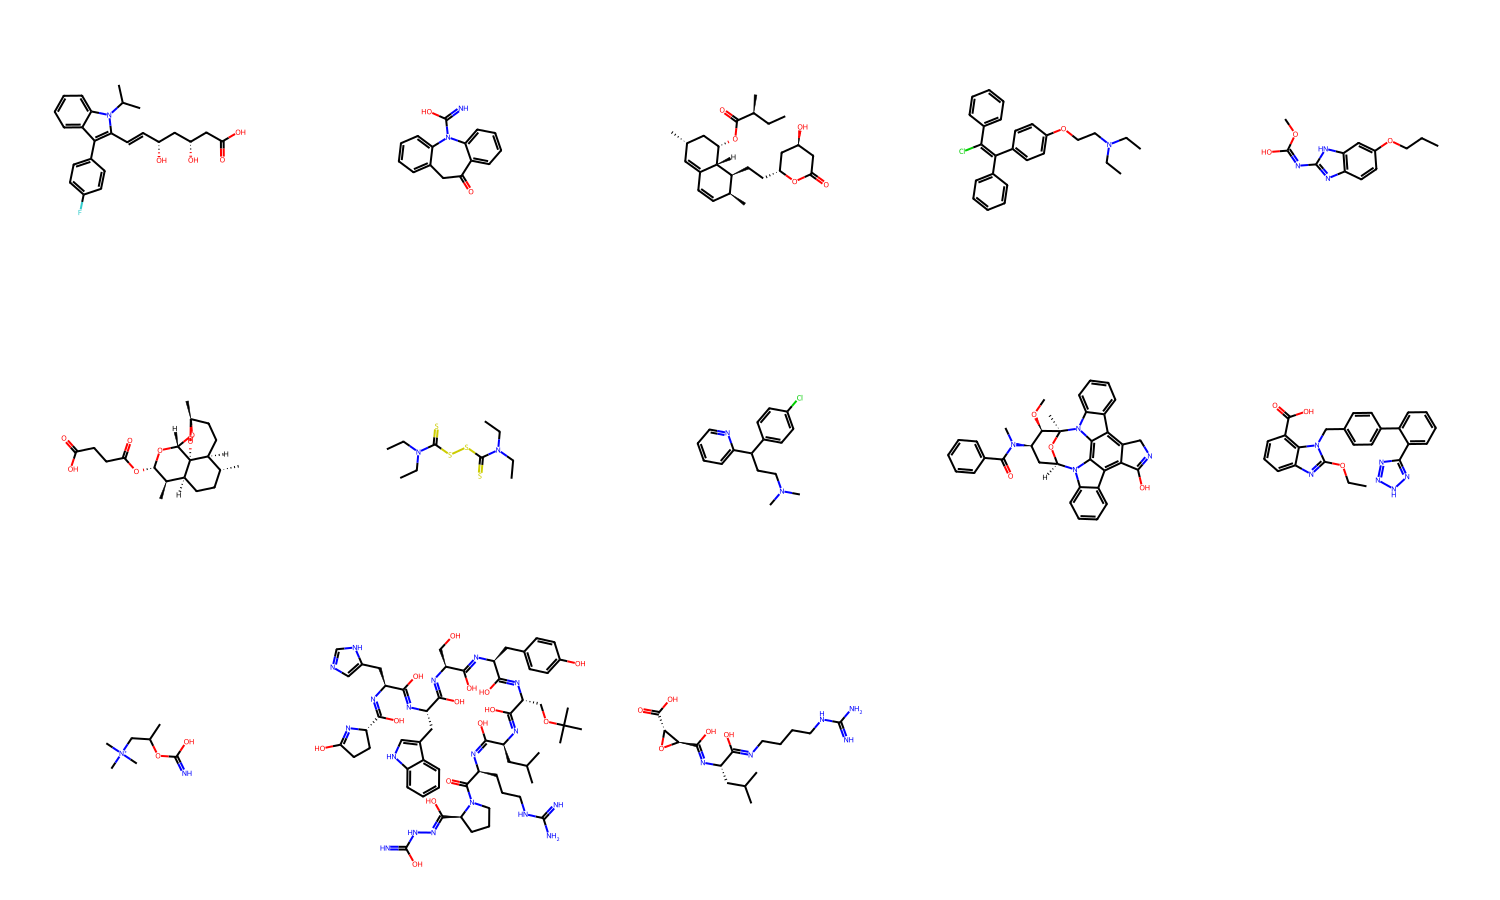

In [39]:

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Convert InChI to RDKit molecule and generate 3D coordinates
def get_3d_structure(inchi):
    mol = Chem.MolFromInchi(inchi)
    if mol:
        return mol
    else:
        return None

# Get the first 10 InChIs and convert them to molecules
first_10_inchis = df_screen.sort_values(by='Distance', ascending=False)['inchi'].head(13)
molecules = [get_3d_structure(inchi) for inchi in first_10_inchis if inchi]

# Filter out None values in case of invalid InChIs
valid_molecules = [mol for mol in molecules if mol]

# Draw 3D structures of the molecules
Draw.MolsToGridImage(valid_molecules, molsPerRow=5, subImgSize=(300, 300))


In [40]:
def assign_color(row):
    if row['new_role'] == "Positive Control" and row['new_role_structure'] == "Positive Control":
        return "red"  # Positive Control


    elif row['new_role'] == "Selected Compound":
        return "blue"  # Selected Compound Only
    else:
        return "gray"  # Others

# Apply the function to create the 'colors' column
df_screen['colors'] = df_screen.apply(assign_color, axis=1)


KeyError: 'new_role_structure'

In [ ]:
df = df_screen


fingerprints = compute_morgan_fingerprints(df['inchi'])
profiles = np.stack(df_screen['Embeddings_mean']).astype(np.float64)

umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(fingerprints)

umap_result_2 = umap_reducer.fit_transform(profiles)

df['UMAP_1_fingerprint'] = umap_result[:, 0]
df['UMAP_2_fingerprint'] = umap_result[:, 1]
df['UMAP_1_profile'] = umap_result_2[:, 0]
df['UMAP_2_profile'] = umap_result_2[:, 1]


In [ ]:
colors = df['colors']
plt.figure(figsize=(10, 8))
plt.scatter(umap_result_2[:, 0], umap_result_2[:, 1], c=colors, alpha=0.8)

plt.tight_layout()
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors, alpha=0.8)

plt.tight_layout()
plt.grid()
plt.show()


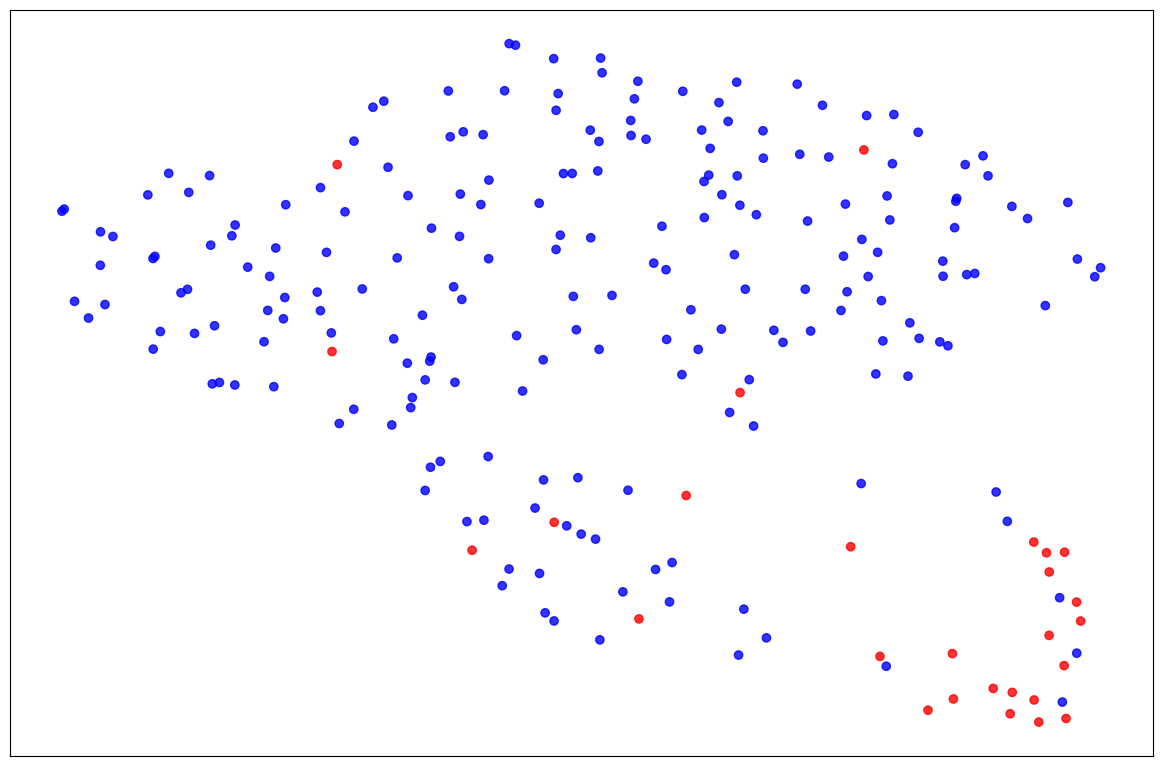

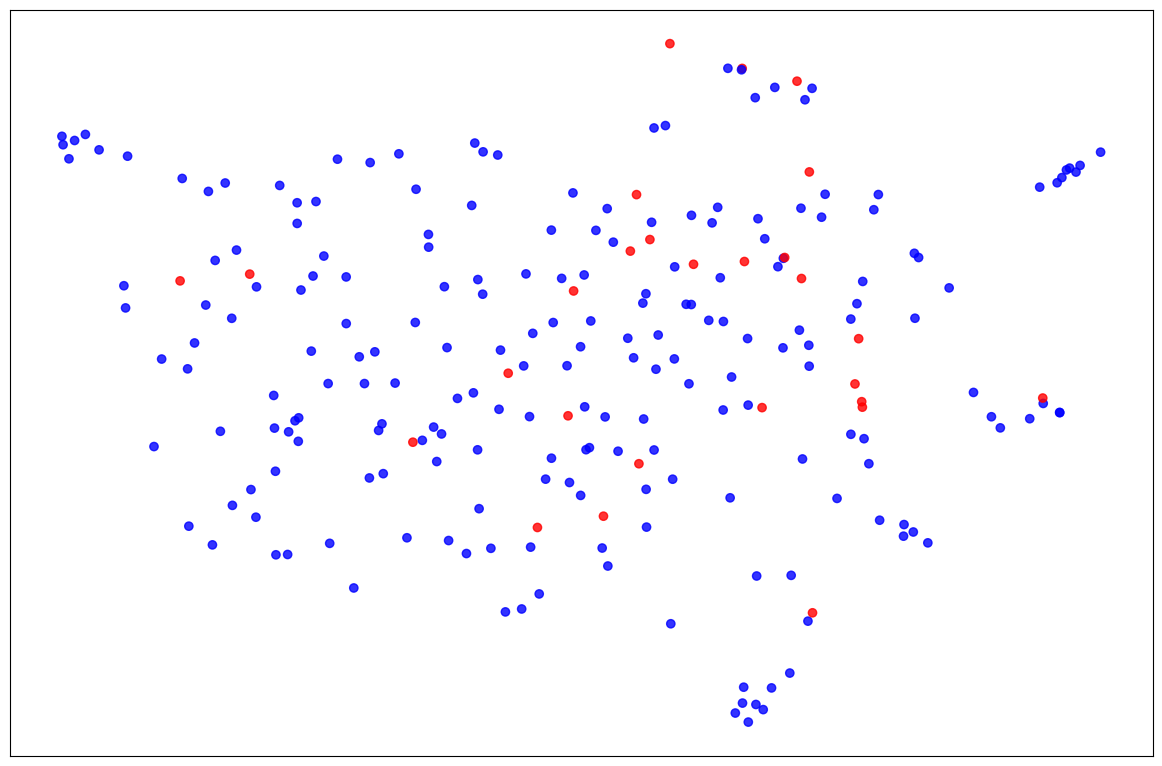

In [ ]:
legend_labels = {
    "red": "Positive Control",
    "blue": "Selected Compound",
    "gray": "Others"
}

# Create the handles for the legend
handles = [
    plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='', label=label)
    for color, label in legend_labels.items()
]

# Plot the first UMAP
plt.figure(figsize=(12, 8))
plt.scatter(umap_result_2[:, 0], umap_result_2[:, 1], c=colors, alpha=0.8)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.grid()
plt.show()

# Plot the second UMAP
plt.figure(figsize=(12, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors, alpha=0.8)
plt.tight_layout()
plt.grid()
plt.xticks([])  # Remove X-axis numbers
plt.yticks([])
plt.show()

In [ ]:
hover_data = df[['Metadata_JCP2022', 'new_role', 'Metadata_Bioactivity']]
hover_data = df[['Metadata_JCP2022', 'Metadata_Bioactivity']]

# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x='UMAP_1_profile',
    y='UMAP_2_profile',
    color='colors',
    color_discrete_map={'Positive Control': 'green', 'Selected Compounds': 'red', 'Others': 'blue'},
    hover_data={
        'Metadata_JCP2022': True,
        'Metadata_Bioactivity': True,
        'UMAP_1_profile': False,  # Disable UMAP coordinates in hover (optional)
        'UMAP_2_profile': False   # Disable UMAP coordinates in hover (optional)
    },
    labels={'color': 'Bioactivity'},
    title="Interactive UMAP of Morgan Fingerprints"
)

# Show the interactive plot
fig.show()


# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df,
    x='UMAP_1_fingerprint',
    y='UMAP_2_fingerprint',
    color='colors',
    color_discrete_map={'Positive Control': 'green', 'Selected Compounds': 'red', 'Others': 'blue'},
    hover_data={
        'Metadata_JCP2022': True,
        'Metadata_Bioactivity': True,
        'UMAP_1_fingerprint': False,  # Disable UMAP coordinates in hover (optional)
        'UMAP_2_fingerprint': False   # Disable UMAP coordinates in hover (optional)
    },
    labels={'color': 'Bioactivity'},
    title="Interactive UMAP of Morgan Fingerprints"
)

# Show the interactive plot
fig.show()


KeyError: "['new_role'] not in index"

In [ ]:
df[df['Metadata_JCP2022'] == "JCP2022_013346"]

In [ ]:
df[df['Metadata_JCP2022'] == "JCP2022_020269"]

In [ ]:
from rdkit import Chem
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem import AllChem
import itertools
import pandas as pd

# Function to compute the molecular fingerprint
def get_fingerprint(inchi):
    try:
        mol = Chem.MolFromInchi(inchi)
        if mol is not None:
            return AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        else:
            return None
    except:
        return None

# Generate fingerprints for all molecules in the DataFrame
df_screen['fingerprint'] = df_screen['inchi'].apply(get_fingerprint)

# Filter valid fingerprints
valid_fingerprints = df_screen[df_screen['fingerprint'].notnull()]

# Find the most similar pairs of molecules based on Tanimoto similarity
pairs = []
similarities = []

for (idx1, row1), (idx2, row2) in itertools.combinations(valid_fingerprints.iterrows(), 2):
    fp1, fp2 = row1['fingerprint'], row2['fingerprint']
    similarity = TanimotoSimilarity(fp1, fp2)
    pairs.append((row1['Metadata_JCP2022'], row2['Metadata_JCP2022']))
    similarities.append(similarity)

# Create a DataFrame of the pairs and their similarities
similarity_df = pd.DataFrame(pairs, columns=["Molecule 1", "Molecule 2"])
similarity_df["Tanimoto Similarity"] = similarities

# Sort by Tanimoto similarity in descending order
most_similar_pairs = similarity_df.sort_values(by="Tanimoto Similarity", ascending=False)


In [ ]:
idx = df.sort_values(by='Distance').head(14)['Metadata_JCP2022'].to_list()

In [ ]:
row[1]['Molecule 2'] 

In [ ]:
most_similar_pairs['Molecule 1'].nunique()

In [ ]:
for row in most_similar_pairs.iterrows():
    if row[1]['Molecule 1'] in idx or row[1]['Molecule 2'] in idx:
        print(row)